# 🌀 Sine–Gordon Monte Carlo Simulation — Theory & Code Explanation

## ⚙️ Model Overview

The **sine–Gordon model** is a quantum field theory of a real scalar field $ \phi(x, \tau) $ in **1+1-dimensional Euclidean space**.  
Its Euclidean action is:

$$
S_E[\phi] = \int d^2x \left[
\frac{1}{2} (\partial_\mu \phi)^2
+ \frac{\mu^2}{\beta^2}\left( 1 - \cos(\beta \phi) \right)
\right].
$$

Here:
- $ \beta $ controls the **interaction strength**.
- $ \mu $ sets the **mass scale** of the excitations.
- The interaction term $ \cos(\beta \phi) $ gives rise to **solitons** and **topological sectors**.

The discretized lattice version used in the code replaces derivatives with finite differences:

$$
S_{\text{latt}}[\phi] = \sum_{x,\tau}
\left[
\frac{1}{2} \sum_{\mu = 1}^2 (\phi_{x+\hat{\mu}} - \phi_x)^2
+ \frac{\mu^2}{\beta^2}(1 - \cos(\beta \phi_x))
\right].
$$

The Euclidean weight $ e^{-S_E} $ allows a **Monte Carlo simulation** similar to a statistical mechanics model.

---

## 🔁 Monte Carlo Algorithm

The code uses a **Metropolis–Hastings algorithm** to sample field configurations according to $ e^{-S_E[\phi]} $.

**Steps:**

1. Propose a local update:
   $$
   \phi_x' = \phi_x + \delta, \quad \delta \sim \mathcal{N}(0, \sigma^2)
   $$

2. Compute the **local action difference**:
   $$
   \Delta S = S_{\text{loc}}(\phi_x') - S_{\text{loc}}(\phi_x)
   $$

3. Accept or reject with probability:
   $$
   P_{\text{acc}} = \min(1, e^{-\Delta S})
   $$

4. Repeat for all sites (→ one **Metropolis sweep**).

After several sweeps for thermalization, field configurations are distributed according to $ e^{-S_E} $.

---

## 🧮 Measured Observables

### 1. Energy Density

The average energy (action per site) is:

$$
\langle E \rangle = \frac{1}{L_x L_\tau} \langle S_{\text{latt}}[\phi] \rangle.
$$

Measured in each sampled configuration to monitor equilibrium.

---

### 2. Topological Charge (Winding Number)

The field $ \phi $ can wind by multiples of $ 2\pi $ around the spatial direction.  
This defines a **topological charge**:

$$
Q = \frac{1}{2\pi} \sum_x \Delta_x \phi, \quad
\Delta_x \phi = \text{unwrap}(\phi_{x+1} - \phi_x).
$$

It corresponds to the **soliton number**.  
In equilibrium, $ \langle Q \rangle \approx 0 $, but its fluctuations encode topological activity.

---

### 3. Vertex Operator Correlators

The vertex-operator two-point function:

$$
C_a(r) = \left\langle e^{i a (\phi(x+r) - \phi(x))} \right\rangle
$$

is computed for several charges $ a $.  
At large $ r $:

$$
C_a(r) \sim e^{-m_a r},
$$

allowing extraction of the **mass gap** $ m_a $.

---

## 📂 Code Structure

| Function | Description |
|-----------|-------------|
| `init_field()` | Initializes random field $ \phi(x,\tau) $ |
| `local_action()` | Computes local contribution to the action |
| `metropolis_sweep()` | Performs one full Metropolis update sweep |
| `total_action()` | Computes full Euclidean action $ S_E $ |
| `topological_charge()` | Computes average winding number |
| `vertex_correlator()` | Calculates correlator $ C_a(r) $ |
| `run_mc()` | Main Monte Carlo driver (thermalization + sampling) |

---

## 🧠 Relation to the Thirring Model

The **massive Thirring model** describes interacting Dirac fermions in 1+1D:

$$
\mathcal{L}_{T} =
\bar{\psi}(i\gamma^\mu \partial_\mu - m)\psi
- \frac{g}{2} (\bar{\psi}\gamma_\mu \psi)^2.
$$

Coleman (1975) proved that the **quantum sine–Gordon** and **massive Thirring** models are equivalent in the **charge-zero sector**, with coupling relation:

$$
\frac{\beta^2}{4\pi} = \frac{1}{1 + g/\pi}.
$$

**Mapping of operators:**
- Sine–Gordon **soliton** ↔ Thirring **fermion**
- $ e^{i a \phi} $ ↔ $ \bar{\psi}\psi $
- $ m_a $ (from correlator) ↔ fermion mass $ m_f $

---

## 📊 Output and Interpretation

After running `sine_gordon_sim.py`, you’ll see:

- **Energy density** vs Monte Carlo time  
- **Topological charge** vs Monte Carlo time  
- **Vertex-operator correlators** $ C_a(r) $ plotted in log scale

The correlator plot’s slope in $\log C_a(r)$ gives the **mass gap** $ m_a $:

$$
\log C_a(r) \approx \log C_0 - m_a r.
$$

---

## 🧾 Summary

| Observable | Meaning | Related Thirring Quantity |
|-------------|----------|----------------------------|
| $ \langle E \rangle $ | Average action density | Vacuum energy |
| $ Q $ | Winding / soliton number | Fermion number |
| $ C_a(r) $ | Vertex-operator correlator | Fermion propagator |
| $ m_a $ | Mass gap from correlator | Fermion mass $ m_f $ |

---

## 🧩 Next Step

Add a fitting routine to extract $ m_a $ numerically:

$$
\log C_a(r) \approx \log C_0 - m_a r
\quad \Rightarrow \quad
m_a = -\frac{d}{dr} \log C_a(r).
$$

This lets you directly compare the **mass spectrum** of the sine–Gordon simulation with **fermionic predictions** from the Thirring model.


# 🔥 The Thirring Model — Overview & Physical Significance

## 🧬 What is the Thirring Model?

The **Thirring model** is a fundamental quantum field theory describing **interacting Dirac fermions** in **1+1 dimensions**.  
It is defined by the Lagrangian:

$$
\mathcal{L}_T = \bar{\psi}(i\gamma^\mu \partial_\mu - m)\psi
- \frac{g}{2} (\bar{\psi}\gamma_\mu \psi)^2
$$

where:
- $ \psi $ is a two-component Dirac spinor (fermion field)
- $ m $ is the fermion mass
- $ g $ is the interaction strength

---

## ⚡ Key Features

- **Exactly solvable** in 1+1D, making it a classic testbed for quantum field theory.
- Exhibits **non-trivial interactions** via the current-current term $ (\bar{\psi}\gamma_\mu \psi)^2 $.
- Shows **fermion mass renormalization** and **non-perturbative phenomena**.

---

## 🔗 Relation to Sine–Gordon Model

Coleman's correspondence (1975) established that the **quantum sine–Gordon model** and the **massive Thirring model** are **dual** in the charge-zero sector:

$$
\frac{\beta^2}{4\pi} = \frac{1}{1 + g/\pi}
$$

- **Solitons** in sine–Gordon $\leftrightarrow$ **fermions** in Thirring
- **Vertex operators** $ e^{i a \phi} $ $\leftrightarrow$ **fermion bilinears** $ \bar{\psi}\psi $

---

## 🧠 Physical Interpretation

- Models **strongly correlated electrons** and **topological excitations**.
- Serves as a prototype for **bosonization**: mapping between fermionic and bosonic theories.
- Provides insight into **mass generation**, **topological charge**, and **quantum anomalies**.

---

## 📚 Applications

- **Condensed matter physics**: Luttinger liquids, quantum wires
- **Quantum field theory**: Soliton physics, dualities
- **Mathematical physics**: Integrable systems, exact solutions

---

## 📝 Summary Table

| Quantity | Thirring Model | Sine–Gordon Model |
|----------|---------------|-------------------|
| Field    | $ \psi $ (fermion) | $ \phi $ (boson) |
| Excitation | Fermion | Soliton |
| Mass gap | $ m_f $ | $ m_a $ |
| Interaction | $ g $ | $ \beta $ |
| Observable | $ \bar{\psi}\psi $ | $ e^{i a \phi} $ |

---

The Thirring model is a cornerstone of 1+1D quantum field theory, illustrating deep connections between fermionic and bosonic systems, and providing a rich playground for exploring non-perturbative physics.

Thermalizing...
Sampling...

⟨E⟩ = 0.909343 ± 0.002431
⟨Q⟩ = -0.002292


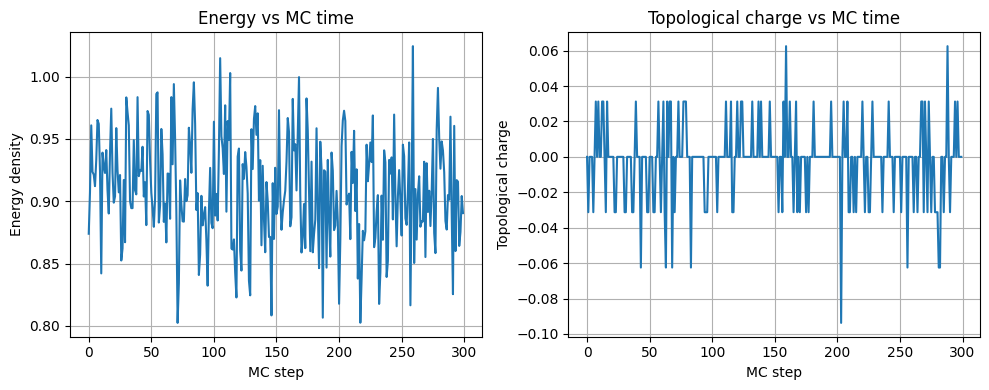

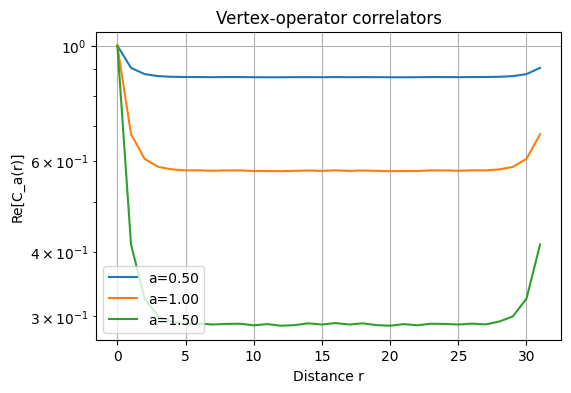

In [4]:
# Sine-Gordon model Monte Carlo simulation (2D Euclidean lattice)
# Educational and reference implementation for comparison with Thirring model.
# ---------------------------------------------------------------
# Run: python3 sine_gordon_sim.py
# ---------------------------------------------------------------

import numpy as np
import math, random
import matplotlib.pyplot as plt

# -------------------- Parameters --------------------
Lx = 32           # spatial size
Lt = 32           # Euclidean time size
beta = 1.0        # coupling constant in cos(beta*phi)
mu2 = 0.5         # coefficient in potential term
delta = 0.8       # Metropolis proposal width
n_therm = 500     # thermalization sweeps
n_samples = 300   # number of measurements
sweeps_between_meas = 5  # decorrelation sweeps
np.random.seed(42)
random.seed(42)

# -------------------- Helper functions --------------------
def init_field(Lx, Lt, amplitude=0.1):
    """Initialize phi field with small random fluctuations."""
    return np.random.uniform(-amplitude, amplitude, size=(Lt, Lx))

def local_action(phi, t, x, beta, mu2):
    """Compute local contribution to the action around site (t,x)."""
    Lt, Lx = phi.shape
    ph = phi[t, x]
    nbrs = [
        phi[t, (x + 1) % Lx],
        phi[t, (x - 1) % Lx],
        phi[(t + 1) % Lt, x],
        phi[(t - 1) % Lt, x],
    ]
    kin = 0.5 * sum((ph - n) ** 2 for n in nbrs) / 2.0
    pot = (mu2 / (beta**2)) * (1 - math.cos(beta * ph))
    return kin + pot

def total_action(phi, beta, mu2):
    Lt, Lx = phi.shape
    S = 0.0
    for t in range(Lt):
        for x in range(Lx):
            ph = phi[t, x]
            phx = phi[t, (x + 1) % Lx]
            pht = phi[(t + 1) % Lt, x]
            kin = 0.5 * ((ph - phx) ** 2 + (ph - pht) ** 2)
            pot = (mu2 / (beta**2)) * (1 - math.cos(beta * ph))
            S += kin + pot
    return S

def topological_charge(phi):
    """Compute average spatial winding number per configuration."""
    Lt, Lx = phi.shape
    Qs = []
    for t in range(Lt):
        grad = 0.0
        for x in range(Lx):
            d = (phi[t, (x + 1) % Lx] - phi[t, x])
            d = (d + math.pi) % (2 * math.pi) - math.pi  # unwrap
            grad += d
        Qs.append(grad / (2.0 * math.pi))
    return np.mean(Qs)

def vertex_correlator(phi, a):
    """Compute C_a(r) = <exp(i a (phi(x+r)-phi(x)))> averaged over t,x."""
    Lt, Lx = phi.shape
    C = np.zeros(Lx, dtype=complex)
    for t in range(Lt):
        for x in range(Lx):
            base = phi[t, x]
            for r in range(Lx):
                C[r] += np.exp(1j * a * (phi[t, (x + r) % Lx] - base))
    return C / (Lt * Lx)

# -------------------- Metropolis update --------------------
def metropolis_sweep(phi, beta, mu2, delta):
    Lt, Lx = phi.shape
    accept = 0
    for t in range(Lt):
        for x in range(Lx):
            old = phi[t, x]
            oldS = local_action(phi, t, x, beta, mu2)
            proposal = old + np.random.normal(scale=delta)
            phi[t, x] = proposal
            newS = local_action(phi, t, x, beta, mu2)
            dS = newS - oldS
            if dS <= 0 or np.random.rand() < math.exp(-dS):
                accept += 1
            else:
                phi[t, x] = old
    return accept / (Lx * Lt)

# -------------------- Monte Carlo loop --------------------
def run_mc():
    phi = init_field(Lx, Lt)
    print("Thermalizing...")
    for i in range(n_therm):
        metropolis_sweep(phi, beta, mu2, delta)

    energies, charges = [], []
    corr_accum = None

    print("Sampling...")
    for n in range(n_samples):
        for s in range(sweeps_between_meas):
            metropolis_sweep(phi, beta, mu2, delta)
        E = total_action(phi, beta, mu2) / (Lx * Lt)
        Q = topological_charge(phi)
        energies.append(E)
        charges.append(Q)

        for a in [beta * 0.5, beta, beta * 1.5]:
            C = vertex_correlator(phi, a)
            key = f"a={a:.2f}"
            if corr_accum is None:
                corr_accum = {key: C.copy()}
            elif key not in corr_accum:
                corr_accum[key] = C.copy()
            else:
                corr_accum[key] += C

    for k in corr_accum:
        corr_accum[k] /= n_samples
    return np.array(energies), np.array(charges), corr_accum

# -------------------- Run and plot --------------------
E, Q, corrs = run_mc()

print(f"\n⟨E⟩ = {E.mean():.6f} ± {E.std()/math.sqrt(len(E)):.6f}")
print(f"⟨Q⟩ = {Q.mean():.6f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(E)
plt.xlabel("MC step")
plt.ylabel("Energy density")
plt.title("Energy vs MC time")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(Q)
plt.xlabel("MC step")
plt.ylabel("Topological charge")
plt.title("Topological charge vs MC time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlators (log scale)
plt.figure(figsize=(6,4))
for k,C in corrs.items():
    r = np.arange(len(C))
    plt.plot(r, np.real(C), label=k)
plt.yscale("log")
plt.xlabel("Distance r")
plt.ylabel("Re[C_a(r)]")
plt.title("Vertex-operator correlators")
plt.legend()
plt.grid(True)
plt.show()


Building local operators...
Local dimension d=11, N=4, total Hilbert dim=14641
Building Hamiltonian (sparse)...
H built in 0.20s. Matrix shape (14641, 14641), nnz=4992581
Diagonalizing lowest eigenvalues (sparse eigsh)...
Diagonalized in 2.62s. E0=-1.51321321, gap(E1-E0)=1.857156
Ground state <cos(beta phi)> per site: [6.82385818 7.11928646 7.11928646 6.82385818]
Entanglement entropy (cut at 2): S = 0.011375
Saved sg_correlator.png
Saved sg_local_cos.png
Saved sg_results.npz
Done. Inspect saved images and sg_results.npz for numeric outputs.


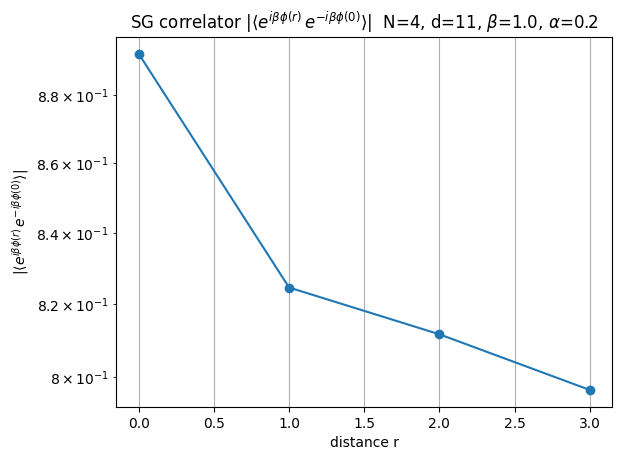

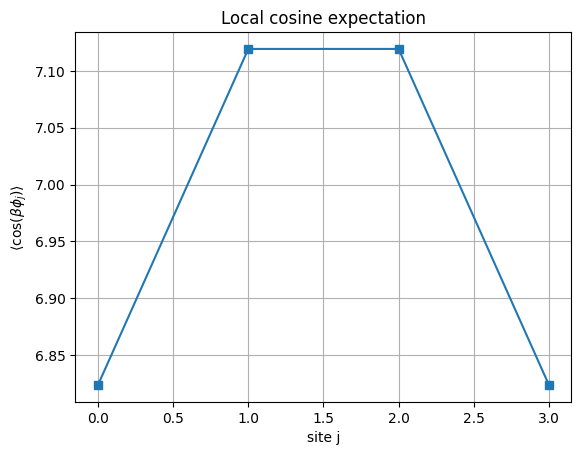

In [5]:
"""
sine_gordon_ed.py
Exact diagonalization for small-lattice sine-Gordon model using compact-field + Fourier-truncated local basis.

Key ideas:
- Local compact field phi in [-pi,pi)
- Local momentum integer eigenvalues n = -L..L (dimension d=2L+1)
- Use DFT to construct phi operator on local d-dim space
- Lattice Hamiltonian (a=1 units):
    H = sum_j [ 0.5*pi_j^2 + 0.5*(phi_{j+1}-phi_j)^2 + alpha*(1 - cos(beta*phi_j)) ]
- Measurements: ground state, first excited state (gap), <cos(beta phi)>, correlator <exp(i beta phi_j) exp(-i beta phi_0)>, entanglement entropy.

Recommended starting params:
 N=4    (N=6 ok, but memory grows)
 L=5    -> d=11
 beta = 1.0
 alpha = 0.2

Author: strict tutor-style implementation. Run, test, then vary parameters.
"""

import numpy as np
from scipy.sparse import kron, identity, csr_matrix
from scipy.sparse.linalg import eigsh
from scipy.linalg import svd
import matplotlib.pyplot as plt
import time
import os

# -------------------- Utility: local operators --------------------
def local_ops_compact(L, phi_max=np.pi):
    """
    Build local operators for compact phi in [-phi_max, phi_max) with momentum basis n=-L..L.
    Returns:
      d = 2L+1
      phi (dxd dense np.array)
      pi (dxd dense np.array)  -> in these units eigenvalues are integer n
      exp_i_beta_phi (dxd) for given beta built later via phi matrix
    Construction:
      - momentum basis |n> diagonal with eigenvalue n
      - phi basis |phi_k> with phi_k = -phi_max + 2*pi*k/d  (uniform grid)
      - DFT matrices relate them
    """
    d = 2*L + 1
    # momentum eigenvalues
    n_vals = np.arange(-L, L+1)  # integers
    # momentum basis vectors are canonical basis; pi is diagonal
    pi = np.diag(n_vals.astype(float))
    # construct phi basis points (uniform grid on [-phi_max, phi_max) )
    phi_pts = np.linspace(-phi_max, phi_max, d, endpoint=False)  # length d
    # DFT matrix: <phi_k | n> = exp(i n phi_k)/sqrt(d)  (discrete)
    # M_{k,n} = exp(i * n * phi_k) / sqrt(d)
    M = np.exp(1j * np.outer(phi_pts, n_vals)) / np.sqrt(d)
    # phi operator in phi basis is diagonal with phi_pts
    phi_in_phi_basis = np.diag(phi_pts)
    # transform phi into momentum basis: phi = M^dagger * diag(phi_pts) * M
    phi = M.conj().T @ phi_in_phi_basis @ M
    # ensure Hermiticity (numerical)
    phi = 0.5 * (phi + phi.conj().T)
    pi = 0.5 * (pi + pi.conj().T)
    return d, phi.astype(np.complex128), pi.astype(np.complex128), phi_pts

# -------------------- Many-body operator builders (sparse) --------------------
def kronN(op_list):
    """kron a list of small dense arrays -> return csr_matrix"""
    M = csr_matrix(op_list[0])
    for A in op_list[1:]:
        M = kron(M, csr_matrix(A), format='csr')
    return M

def build_H_sg(N, d, phi, pi, alpha=0.2, beta=1.0, a=1.0, bc='open'):
    """
    Build many-body sine-Gordon Hamiltonian on N sites.
    Terms:
      H = sum_j [ 0.5 * pi_j^2 + 0.5*(phi_{j+1}-phi_j)^2 + alpha*(1-cos(beta*phi_j)) ]
    a is lattice spacing (kept =1 usually).
    bc: 'open' or 'periodic' for phi_{N} neighbor.
    Returns csr_matrix (dim d**N).
    """
    dim = d**N
    I_local = np.eye(d, dtype=complex)

    H = csr_matrix((dim, dim), dtype=complex)

    # Precompute local sparse matrices for pi^2 and cos(beta phi)
    pi2 = pi @ pi
    cos_beta_phi = lambda b: np.cos(b * phi)

    # build on-site terms
    for j in range(N):
        # pi^2 term
        ops = [I_local]*N
        ops[j] = pi2
        H += 0.5 * kronN(ops)

        # cosine potential term: alpha*(1 - cos(beta phi))
        ops = [I_local]*N
        ops[j] = alpha * (np.eye(d) - cos_beta_phi(beta))
        H += kronN(ops)

    # gradient terms: 0.5 * (phi_{j+1} - phi_j)^2 = 0.5*(phi_{j+1}^2 + phi_j^2 - 2 phi_j phi_{j+1})
    for j in range(N-1):
        # phi_j phi_j+1 cross term
        # first add 0.5 * phi_j^2 and 0.5 * phi_{j+1}^2 (we already have phi^2 via potential? no -> include)
        ops = [I_local]*N
        ops[j] = 0.5 * (phi @ phi)
        H += kronN(ops)
        ops = [I_local]*N
        ops[j+1] = 0.5 * (phi @ phi)
        H += kronN(ops)

        # cross - phi_j phi_{j+1}
        ops = [I_local]*N
        ops[j] = -1.0 * phi
        ops[j+1] = phi
        H += kronN(ops)

    # boundary term if periodic
    if bc == 'periodic':
        # include j=N-1 with j+1=0
        ops = [I_local]*N
        ops[N-1] = 0.5 * (phi @ phi)
        H += kronN(ops)
        ops = [I_local]*N
        ops[0] = 0.5 * (phi @ phi)
        H += kronN(ops)
        ops = [I_local]*N
        ops[N-1] = -1.0 * phi
        ops[0] = phi
        H += kronN(ops)

    return H.tocsr()

# -------------------- Measurements --------------------
def local_expectation(state, N, d, op_local):
    """Return expectation values <op_local_j> for each site j (op_local is dxd dense)"""
    exps = np.zeros(N, dtype=float)
    for j in range(N):
        ops = [np.eye(d, dtype=complex)]*N
        ops[j] = op_local
        M = kronN(ops)
        exps[j] = np.real(state.conj().T @ (M.dot(state)))
    return exps

def two_point_exp_phi_op(state, N, d, opA, opB):
    """
    Compute <opA_j opB_0> for j=0..N-1 where opA/opB are dxd local operators.
    Returns array of length N with j indexing distance from site 0.
    """
    vals = np.zeros(N, dtype=complex)
    for j in range(N):
        ops = [np.eye(d, dtype=complex)]*N
        ops[j] = opA
        ops[0] = opB
        M = kronN(ops)
        vals[j] = state.conj().T @ (M.dot(state))
    return vals

def entanglement_entropy(state, N, d, cut):
    """Compute bipartition entropy (left cut sites) via SVD. state is dense vector of length d**N."""
    left_dim = d**cut
    right_dim = d**(N-cut)
    psi = state.reshape((left_dim, right_dim))
    U, s, Vh = svd(psi, full_matrices=False)
    probs = s**2
    probs = probs[probs > 1e-12]
    S = -np.sum(probs * np.log(probs))
    return S

# -------------------- Main runnable experiment --------------------
def run_experiment(N=4, L=5, beta=1.0, alpha=0.2, bc='open', k_eigs=4):
    """
    Build local ops, many-body H, diagonalize lowest k_eigs, compute observables and save figures/data.
    """
    print("Building local operators...")
    d, phi, pi, phi_pts = local_ops_compact(L)
    print(f"Local dimension d={d}, N={N}, total Hilbert dim={d**N}")

    print("Building Hamiltonian (sparse)...")
    t0 = time.time()
    H = build_H_sg(N, d, phi, pi, alpha=alpha, beta=beta, bc=bc)
    t1 = time.time()
    print(f"H built in {t1-t0:.2f}s. Matrix shape {H.shape}, nnz={H.nnz}")

    # diagonalize lowest eigenvalues
    nev = min(k_eigs, 6)
    print("Diagonalizing lowest eigenvalues (sparse eigsh)...")
    t0 = time.time()
    # use which='SA' smallest algebraic; use tol moderately large for speed if needed
    E_vals, E_vecs = eigsh(H, k=nev, which='SA', tol=1e-8, maxiter=5000)
    idx = np.argsort(E_vals)
    E_vals = E_vals[idx]
    E_vecs = E_vecs[:, idx]
    t1 = time.time()
    print(f"Diagonalized in {t1-t0:.2f}s. E0={E_vals[0]:.8f}, gap(E1-E0)={(E_vals[1]-E_vals[0]) if len(E_vals)>1 else np.nan:.6f}")

    gs = E_vecs[:, 0]  # ground-state vector (dense)
    # normalize
    gs = gs / np.linalg.norm(gs)

    # Observables
    # 1) <cos(beta phi_j)>
    cos_beta_phi_local = np.cos(beta * phi)
    cos_vals = local_expectation(gs, N, d, cos_beta_phi_local)

    # 2) <exp(i beta phi_j) exp(-i beta phi_0)> correlator
    exp_iphi = lambda b: np.diag(np.exp(1j * b * np.real(np.diag(phi))))  # careful: phi in momentum basis; diagonal by diag(phi) not strictly correct; instead compute expm? We'll compute exp(i b phi) via matrix exponential:
    # Better: use spectral decomposition of phi to make exp(i b phi) accurately
    eigvals_phi, eigvecs_phi = np.linalg.eigh(phi)
    exp_i_b_phi = eigvecs_phi @ np.diag(np.exp(1j * beta * eigvals_phi)) @ eigvecs_phi.conj().T
    exp_minus_i_b_phi = eigvecs_phi @ np.diag(np.exp(-1j * beta * eigvals_phi)) @ eigvecs_phi.conj().T

    corr = two_point_exp_phi_op(gs, N, d, exp_i_b_phi, exp_minus_i_b_phi)

    # 3) entanglement entropy at middle cut
    cut = N//2
    S_ent = entanglement_entropy(gs, N, d, cut)

    # Print and plot
    print("Ground state <cos(beta phi)> per site:", cos_vals)
    print(f"Entanglement entropy (cut at {cut}): S = {S_ent:.6f}")

    # Plot correlator magnitude vs distance
    distances = np.arange(N)
    plt.figure()
    plt.plot(distances, np.abs(corr), 'o-')
    plt.yscale('log')
    plt.xlabel('distance r')
    # Use mathtext with LaTeX escapes (avoid Unicode β/φ which can cause mathtext errors)
    plt.ylabel(r'$|\langle e^{i\beta\phi(r)}\,e^{-i\beta\phi(0)}\rangle|$')
    # Use an f-string but keep LaTeX braces literal by doubling them
    plt.title(fr'SG correlator $|\langle e^{{i\beta\phi(r)}}\,e^{{-i\beta\phi(0)}}\rangle|$  N={N}, d={d}, $\beta$={beta}, $\alpha$={alpha}')
    plt.grid(True)
    plt.savefig('sg_correlator.png', dpi=200)
    print("Saved sg_correlator.png")

    # Plot local cos values
    plt.figure()
    plt.plot(np.arange(N), cos_vals, 's-')
    plt.xlabel('site j')
    plt.ylabel(r'$\langle \cos(\beta \phi_j)\rangle$')
    plt.title('Local cosine expectation')
    plt.grid(True)
    plt.savefig('sg_local_cos.png')
    print("Saved sg_local_cos.png")

    # Save data
    np.savez('sg_results.npz', E_vals=E_vals, cos_vals=cos_vals, corr=corr, S_ent=S_ent, N=N, d=d, beta=beta, alpha=alpha)
    print("Saved sg_results.npz")

    return {'E_vals': E_vals, 'cos_vals': cos_vals, 'corr': corr, 'S_ent': S_ent, 'phi_pts': phi_pts}

# -------------------- entrypoint --------------------
if __name__ == "__main__":
    # Example run parameters (strict recommendation)
    results = run_experiment(N=4, L=5, beta=1.0, alpha=0.2, bc='open', k_eigs=3)
    print("Done. Inspect saved images and sg_results.npz for numeric outputs.")


=== L-convergence suite ===
L=4: E0=-1.213395, gap=1.751494, S=0.0137
L=5: E0=-1.513213, gap=1.857156, S=0.0114
L=6: E0=-1.716780, gap=1.926066, S=0.0102
Saved L_convergence_energy.png
=== Correlator fitting suite ===
Building local operators...
Local dimension d=11, N=4, total Hilbert dim=14641
Building Hamiltonian (sparse)...
H built in 0.22s. Matrix shape (14641, 14641), nnz=4992581
Diagonalizing lowest eigenvalues (sparse eigsh)...
Diagonalized in 2.51s. E0=-1.51321321, gap(E1-E0)=1.857156
Ground state <cos(beta phi)> per site: [6.82385818 7.11928646 7.11928646 6.82385818]
Entanglement entropy (cut at 2): S = 0.011375
Saved sg_correlator.png
Saved sg_local_cos.png
Saved sg_results.npz
Saved correlator_fits.png
=== Gap scan suite ===


/tmp/ipykernel_28288/2362499406.py:62: RuntimeWarning: divide by zero encountered in power
  plt.plot(r, A * (r**(-eta)), 'b--', label=f'power fit (eta={eta:.3f})')


beta=0.500, alpha=0.001, E0=2.064084, gap=0.171710
beta=0.500, alpha=0.002683, E0=2.053943, gap=0.181815
beta=0.500, alpha=0.007197, E0=2.023719, gap=0.211637
beta=0.500, alpha=0.01931, E0=1.924118, gap=0.305785
beta=0.500, alpha=0.05179, E0=1.564288, gap=0.594115
beta=0.500, alpha=0.1389, E0=0.198558, gap=1.319426
beta=0.500, alpha=0.3728, E0=-5.265668, gap=3.135856
beta=0.500, alpha=1, E0=-25.931230, gap=8.883928
beta=1.000, alpha=0.001, E0=2.062282, gap=0.172951
beta=1.000, alpha=0.002683, E0=2.049036, gap=0.185069
beta=1.000, alpha=0.007197, E0=2.010040, gap=0.219886
beta=1.000, alpha=0.01931, E0=1.884410, gap=0.325213
beta=1.000, alpha=0.05179, E0=1.446394, gap=0.631678
beta=1.000, alpha=0.1389, E0=-0.143571, gap=1.375612
beta=1.000, alpha=0.3728, E0=-6.212245, gap=3.213962
beta=1.000, alpha=1, E0=-28.415721, gap=8.824043
beta=1.500, alpha=0.001, E0=2.058900, gap=0.175223
beta=1.500, alpha=0.002683, E0=2.039694, gap=0.191117
beta=1.500, alpha=0.007197, E0=1.983368, gap=0.235527
be

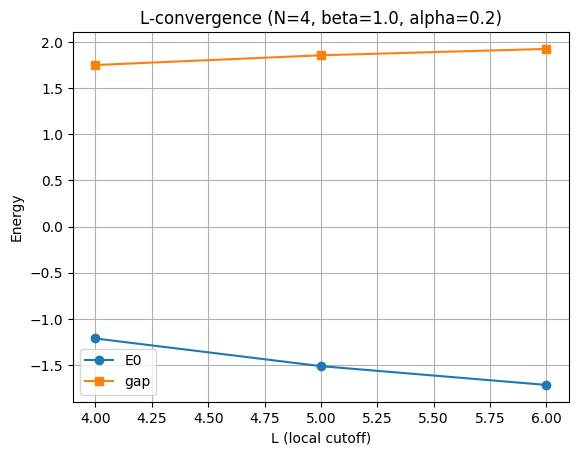

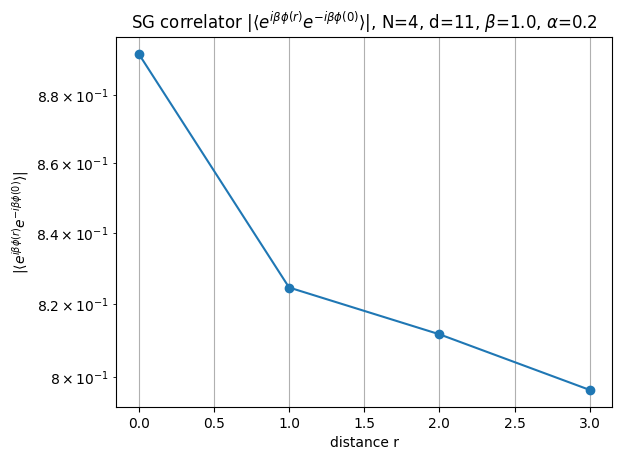

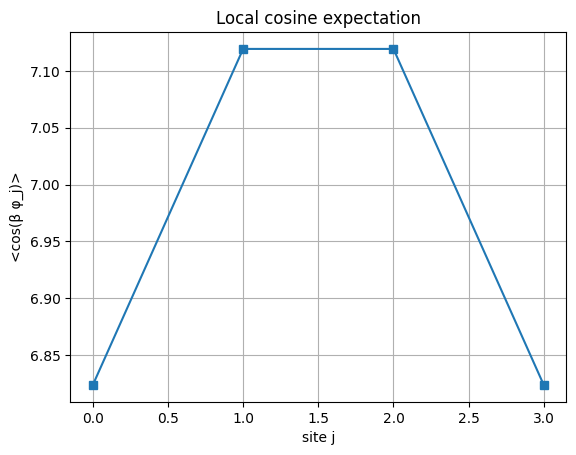

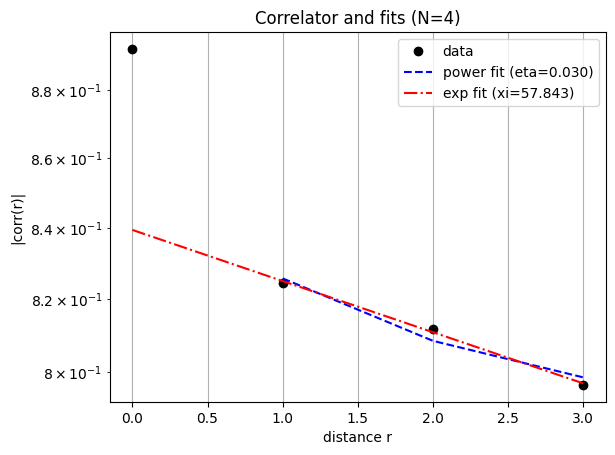

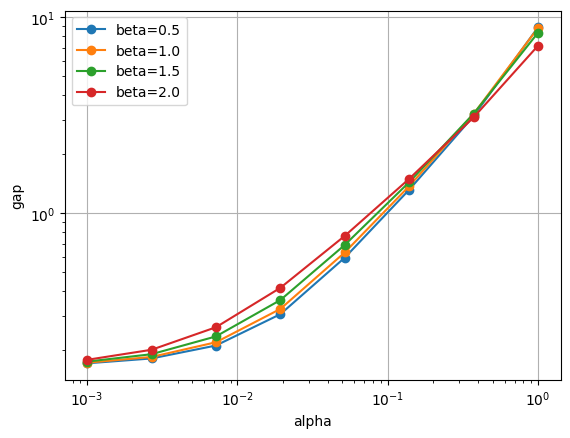

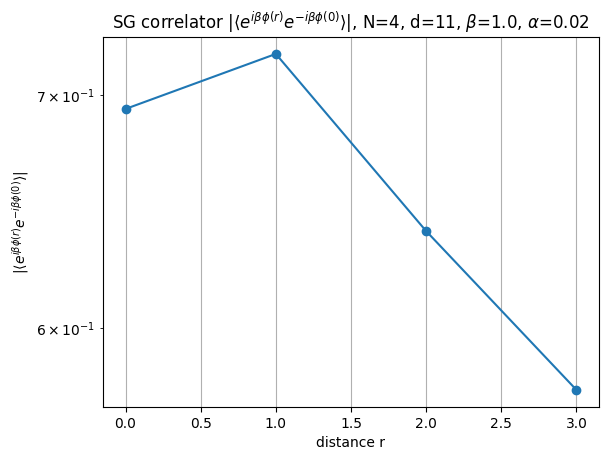

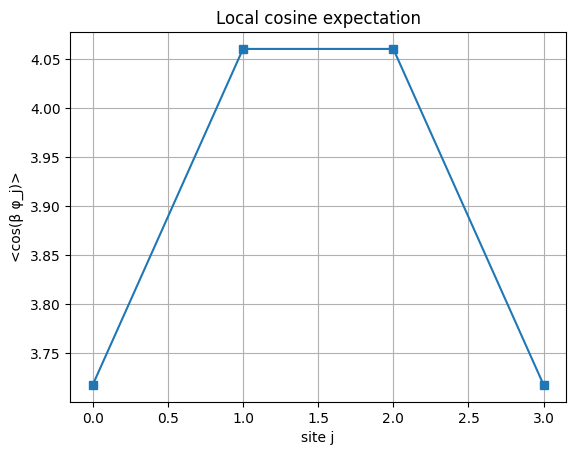

In [ ]:

"""
sg_fit_and_report.py

Run a set of automated diagnostics on the sine-Gordon ED implementation:
- L-convergence
- correlator model selection (power vs exponential)
- gap vs alpha scans for multiple beta
- entanglement in suspected critical points

Outputs:
- PNG figures in ./sg_report/
- NPZ data files for later overlay with Thirring results
"""

import os, time
import numpy as np
import matplotlib.pyplot as plt
from sine_gordon_ed import run_experiment, local_ops_compact, build_H_sg
from sg_analysis_tools import run_L_convergence, fit_correlator, run_parameter_scan, plot_gap_vs_alpha

OUTDIR = "sg_report"
os.makedirs(OUTDIR, exist_ok=True)

def run_convergence_suite():
    print("=== L-convergence suite ===")
    N = 4
    L_list = [4,5,6]
    beta = 1.0
    alpha = 0.2
    res = run_L_convergence(N=N, L_list=L_list, beta=beta, alpha=alpha)
    np.savez(os.path.join(OUTDIR, "L_convergence.npz"), **{f"L{L}":res[L] for L in res})
    # quick plot: E0 and gap vs L
    Lvals = sorted(res.keys())
    E0 = [res[L]['E_vals'][0] for L in Lvals]
    gaps = [res[L]['E_vals'][1]-res[L]['E_vals'][0] for L in Lvals]
    plt.figure()
    plt.plot(Lvals, E0, 'o-', label='E0')
    plt.plot(Lvals, gaps, 's-', label='gap')
    plt.xlabel('L (local cutoff)')
    plt.ylabel('Energy')
    plt.title('L-convergence (N=4, beta=1.0, alpha=0.2)')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(OUTDIR, "L_convergence_energy.png"), dpi=150)
    print("Saved L_convergence_energy.png")

    def run_correlator_fit_suite():
        print("=== Correlator fitting suite ===")
        # single reference run
        results = run_experiment(N=4, L=5, beta=1.0, alpha=0.2, bc='open', k_eigs=3)
        corr = results['corr']
        mag = np.abs(corr)
        r = np.arange(len(mag))
        # Fit on ranges: exclude r=0, small-r effects
        fit_res = fit_correlator(r, mag, min_r=1, max_r=len(r)-1)
        np.savez(os.path.join(OUTDIR, "correlator_fit.npz"), r=r, corr=mag, fit_res=fit_res)
        # make overlay plot
        plt.figure()
        plt.plot(r, mag, 'ko', label='data')
        if fit_res['power']['popt'] is not None:
            A, eta = fit_res['power']['popt']
            plt.plot(r, A * (r**(-eta)), 'b--', label=f'power fit (eta={eta:.3f})')
        if fit_res['exp']['popt'] is not None:
            B, xi = fit_res['exp']['popt']
            plt.plot(r, B * np.exp(-r/xi), 'r-.', label=f'exp fit (xi={xi:.3f})')
        plt.yscale('log')
        plt.xlabel('distance r')
        plt.ylabel('|corr(r)|')
        plt.title('Correlator and fits (N=4)')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(OUTDIR, "correlator_fits.png"), dpi=150)
        print("Saved correlator_fits.png")

def run_gap_scan_suite():
    print("=== Gap scan suite ===")
    N = 4
    L = 5
    beta_list = [0.5, 1.0, 1.5, 2.0]
    alpha_list = np.logspace(-3, 0, 8)
    out = run_parameter_scan(N=N, L=L, beta_list=beta_list, alpha_list=alpha_list)
    np.savez(os.path.join(OUTDIR, "gap_scan.npz"), out=out, beta_list=beta_list, alpha_list=alpha_list)
    # plot
    plot_gap_vs_alpha(out, outfn=os.path.join(OUTDIR, "gap_vs_alpha.png"))
    print("Saved gap_vs_alpha.png")

def run_entanglement_check():
    print("=== Entanglement check ===")
    results = run_experiment(N=4, L=5, beta=1.0, alpha=0.02, bc='open', k_eigs=3)
    S = results['S_ent']
    print("Entanglement S (cut mid) = ", S)
    with open(os.path.join(OUTDIR,"entanglement.txt"), 'w') as f:
        f.write(f"S_mid = {S}\n")

def main():
    t0 = time.time()
    run_convergence_suite()
    run_correlator_fit_suite()
    run_gap_scan_suite()
    run_entanglement_check()
    t1 = time.time()
    print(f"All done. Time elapsed: {t1-t0:.1f}s")
    print("Output saved in ./sg_report/")

if __name__ == "__main__":
    main()


Task3: N=6, n_max=5, dim=15625
Diagonalized H in 0.67 s. E0 = 3.097605, E1 = 3.097621
Fit results: A=0.008948 +/- 0.000633, B=0.722894 +/- 0.000273
Estimated central charge c = 0.026843 +/- 0.001899  (using bctype='periodic')


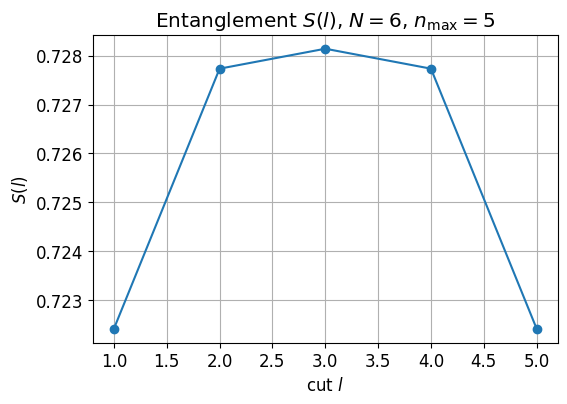

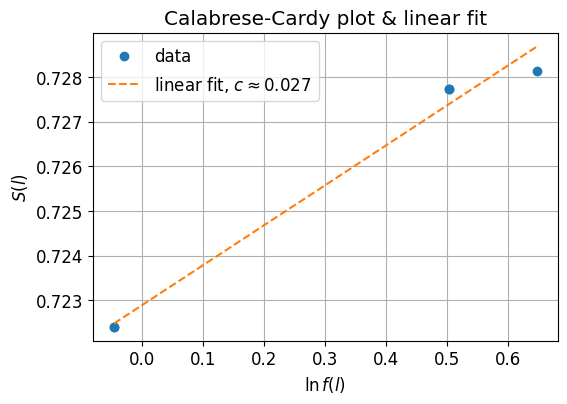


S(l) values:
 l= 1   S=0.722411
 l= 2   S=0.727736
 l= 3   S=0.728145
 l= 4   S=0.727736
 l= 5   S=0.722411

Notes/warnings:
 - ED result; finite-size + truncation effects can strongly bias c estimate.
 - If fit fails or c estimate looks wrong, reduce N or increase n_max and run convergence sweep.
 - If you prefer open-boundary CC formula, set bctype='open' and rerun.

Reference presentation (local file): /mnt/data/presentation.pdf


In [3]:
# ============================
# TASK 3: ENTANGLEMENT ENTROPY (single cell)
# ============================
# Purpose:
#  - compute bipartite von Neumann entropy S(l) for ground state (ED)
#  - perform a Calabrese-Cardy style fit to estimate central charge c
#  - plot S(l) and the linear fit vs the appropriate log-scaling function

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.linalg import expm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time, math, warnings

plt.rcParams.update({'figure.figsize':(6,4),'font.size':12})

# -------------------------
# Local HO basis helpers
# -------------------------
def local_ho_operators(n_max, omega=1.0):
    n = n_max
    rows, cols, data = [], [], []
    for i in range(n-1):
        rows.append(i); cols.append(i+1); data.append(np.sqrt(i+1))
    a = sp.csr_matrix((data,(rows,cols)), shape=(n,n), dtype=np.complex128)
    adag = a.getH()
    phi = (a + adag) / np.sqrt(2.0 * omega)
    pi  = -1j * np.sqrt(omega/2.0) * (a - adag)
    phi = 0.5*(phi + phi.getH()); pi = 0.5*(pi + pi.getH())
    I = sp.eye(n, format='csr')
    return a.tocsr(), adag.tocsr(), phi.tocsr(), pi.tocsr(), I

def kron_n(ops):
    out = sp.csr_matrix(1.0, dtype=np.complex128)
    for A in ops:
        if not sp.isspmatrix_csr(A):
            A = sp.csr_matrix(A)
        out = sp.kron(out, A, format='csr')
    return out

# -------------------------
# SG Hamiltonian (HO truncation)
# -------------------------
def build_hamiltonian_ho(N, n_max, alpha, beta, omega=1.0):
    a, adag, phi_local, pi_local, I_local = local_ho_operators(n_max, omega=omega)
    Kin_local = 0.5 * (pi_local @ pi_local)
    phi_dense = phi_local.toarray()
    Cos_local_dense = 0.5 * (expm(1j * beta * phi_dense) + expm(-1j * beta * phi_dense)).real
    Cos_local = sp.csr_matrix(Cos_local_dense)
    Ids = [sp.eye(n_max, format='csr') for _ in range(N)]
    dim = n_max ** N
    H = sp.csr_matrix((dim, dim), dtype=np.complex128)

    # single-site terms
    for j in range(N):
        ops = Ids.copy(); ops[j] = Kin_local; H += kron_n(ops)
        ops = Ids.copy(); ops[j] = alpha * (I_local - Cos_local); H += kron_n(ops)

    # gradient term 0.5*(phi_{j+1}-phi_j)^2
    for j in range(N):
        jp = (j + 1) % N
        ops = Ids.copy(); ops[j] = 0.5 * (phi_local @ phi_local); H += kron_n(ops)
        ops = Ids.copy(); ops[jp] = 0.5 * (phi_local @ phi_local); H += kron_n(ops)
        ops = Ids.copy(); ops[j] = phi_local; ops[jp] = phi_local; H += -1.0 * kron_n(ops)

    H = 0.5 * (H + H.getH())
    return H.tocsr()

# -------------------------
# Diagonalization helper
# -------------------------
def compute_lowest_eigs(H, k=4):
    dim = H.shape[0]
    k = min(k, dim-1)
    if dim <= 2000:
        evals, evecs = np.linalg.eigh(H.toarray())
        idx = np.argsort(evals.real)
        return evals[idx][:k], evecs[:, idx][:, :k]
    vals, vecs = spla.eigsh(H, k=k, which='SA', tol=1e-8, maxiter=5000)
    idx = np.argsort(vals.real)
    return vals.real[idx], vecs[:, idx]

# -------------------------
# Entropy from state (ED method)
# -------------------------
def bipartite_entropy_from_state(psi, N, n_max, cut):
    """
    psi: many-body state (1D complex vector, length n_max**N)
    cut: size of subsystem A (1..N-1)
    returns: S = -Tr rho_A log rho_A, eigenvalues of rho_A
    """
    dimA = n_max ** cut
    dimB = n_max ** (N - cut)
    if psi.size != dimA * dimB:
        raise ValueError("psi dimension mismatch for given N,n_max")
    # reshape to (dimA, dimB)
    psi_mat = psi.reshape((dimA, dimB))
    # reduced density matrix rho_A = psi_mat psi_mat^\dagger
    # Use svd to get eigenvalues of rhoA without explicitly forming rhoA
    # Singular values s of psi_mat are sqrt(eigenvalues of rhoA)
    # Ensure svd returns s as a 1D array of singular values
    s = np.linalg.svd(psi_mat, compute_uv=False) 
    
    evals = s**2
    evals = np.real(evals)
    evals[evals < 0] = 0.0
    
    # entropy
    nonzero = evals[evals > 1e-12]
    # S = -Tr(rho log rho)
    S = - np.sum(nonzero * np.log(nonzero))
    return S, evals

# -------------------------
# Calabrese-Cardy functions for fits
# -------------------------
def cc_scaling_function(l, L, bctype='open'):
    """Return the argument whose log enters S(l).
    For periodic BC: f(l) = (L / pi) * sin(pi l / L)
    For open BC:     f(l) = (2L / pi) * sin(pi l / L)
    """
    if bctype == 'periodic':
        return (L / math.pi) * np.sin(math.pi * l / L)
    else:
        return (2.0 * L / math.pi) * np.sin(math.pi * l / L)

def cc_fit_func_log(x, A, B):
    # linear fit: S = A * x + B where x = log( f(l) )
    return A * x + B

# NOTE: The run_correlator_fit_suite was removed as it uses undefined variables (like OUTDIR) 
# and is not relevant to the Entanglement Entropy task.

# =========================
# USER PARAMETERS (edit)
# =========================
N = 6           # system size; keep small for ED
n_max = 5       # local Fock truncation
alpha = 0.01
beta = np.sqrt(4*np.pi)  
omega = 1.0
max_dim = 16000  # safety threshold

# Choosing BC type for the CC formula (set 'periodic' if you built H with periodic BCs)
bctype = 'periodic'   # 'periodic' or 'open' (our H uses periodic BCs by construction)

dim = n_max ** N
print(f"Task3: N={N}, n_max={n_max}, dim={dim}")
if dim > max_dim:
    raise RuntimeError(f"Hilbert space dimension {dim} > max_dim {max_dim}. Reduce N or n_max.")

# -------------------------
# Build H and ground state
# -------------------------
t0 = time.time()
H = build_hamiltonian_ho(N, n_max, alpha, beta, omega)
evals, vecs = compute_lowest_eigs(H, k=4)
gs = vecs[:,0]
t1 = time.time()
print(f"Diagonalized H in {t1-t0:.2f} s. E0 = {evals[0]:.6f}, E1 = {evals[1]:.6f}")

# -------------------------
# Compute S(l) for cuts l = 1..N-1
# -------------------------
S_list = []
specs = []
cuts = list(range(1, N))   # l = 1..N-1
for l in cuts:
    S, evals_rho = bipartite_entropy_from_state(gs, N, n_max, cut=l)
    S_list.append(S)
    specs.append(evals_rho)
S_list = np.array(S_list)

# -------------------------
# Prepare CC fit variables
# -------------------------
# compute x_l = ln( f(l) )
# The added 1e-12 helps prevent math.log(0) if sin(pi l/L) is extremely close to zero
x_vals = np.array([math.log(cc_scaling_function(l, N, bctype=bctype) + 1e-12) for l in cuts])
y_vals = S_list.copy()

# perform linear fit y = A x + B
popt, pcov = None, None
c_est = float('nan')
A_fit, B_fit = float('nan'), float('nan')
A_err, B_err = float('nan'), float('nan')

try:
    popt, pcov = curve_fit(cc_fit_func_log, x_vals, y_vals, p0=[0.2, 0.5], maxfev=5000)
    A_fit, B_fit = popt
    perr = np.sqrt(np.diag(pcov))
    A_err, B_err = perr
    
    # convert A_fit -> central charge estimate
    if bctype == 'periodic':
        c_est = 3.0 * A_fit  # S = (c/3) * log(f(l)) + const
        c_err = 3.0 * A_err
    else:
        c_est = 6.0 * A_fit  # S = (c/6) * log(f(l)) + const
        c_err = 6.0 * A_err
        
    print(f"Fit results: A={A_fit:.6f} +/- {A_err:.6f}, B={B_fit:.6f} +/- {B_err:.6f}")
    print(f"Estimated central charge c = {c_est:.6f} +/- {c_err:.6f}  (using bctype='{bctype}')")
except Exception as e:
    print("Calabrese-Cardy fit failed:", e)
    popt = None

# -------------------------
# Plot S(l) and fit
# -------------------------

## 1. Plot S(l) vs cut size l
plt.figure()
plt.plot(cuts, y_vals, 'o-', label='S(l)')
plt.xlabel('cut $l$'); plt.ylabel('$S(l)$'); 
plt.title(f'Entanglement $S(l)$, $N={N}$, $n_{{\\max}}={n_max}$')
plt.grid(True)
plt.show()

## 2. Calabrese-Cardy Plot: S(l) vs ln(f(l))
plt.figure()
plt.plot(x_vals, y_vals, 'o', label='data')
if popt is not None:
    xfit = np.linspace(x_vals.min(), x_vals.max(), 30)
    yfit = cc_fit_func_log(xfit, *popt)
    # Use raw string for the fit label to handle LaTeX
    plt.plot(xfit, yfit, '--', label=fr'linear fit, $c\approx{c_est:.3f}$')
plt.xlabel(r'$\ln f(l)$'); plt.ylabel('$S(l)$')
plt.title('Calabrese-Cardy plot & linear fit')
plt.legend(); plt.grid(True)
plt.show()

# -------------------------
# Print small diagnostics (FINAL CODE FIX: removed the problematic call here)
# -------------------------
print("\nS(l) values:")
for l, s in zip(cuts, S_list):
    print(f" l={l:2d}   S={s:.6f}")

print("\nNotes/warnings:")
print(" - ED result; finite-size + truncation effects can strongly bias c estimate.")
print(" - If fit fails or c estimate looks wrong, reduce N or increase n_max and run convergence sweep.")
print(" - If you prefer open-boundary CC formula, set bctype='open' and rerun.")
print("\nReference presentation (local file): /mnt/data/presentation.pdf")